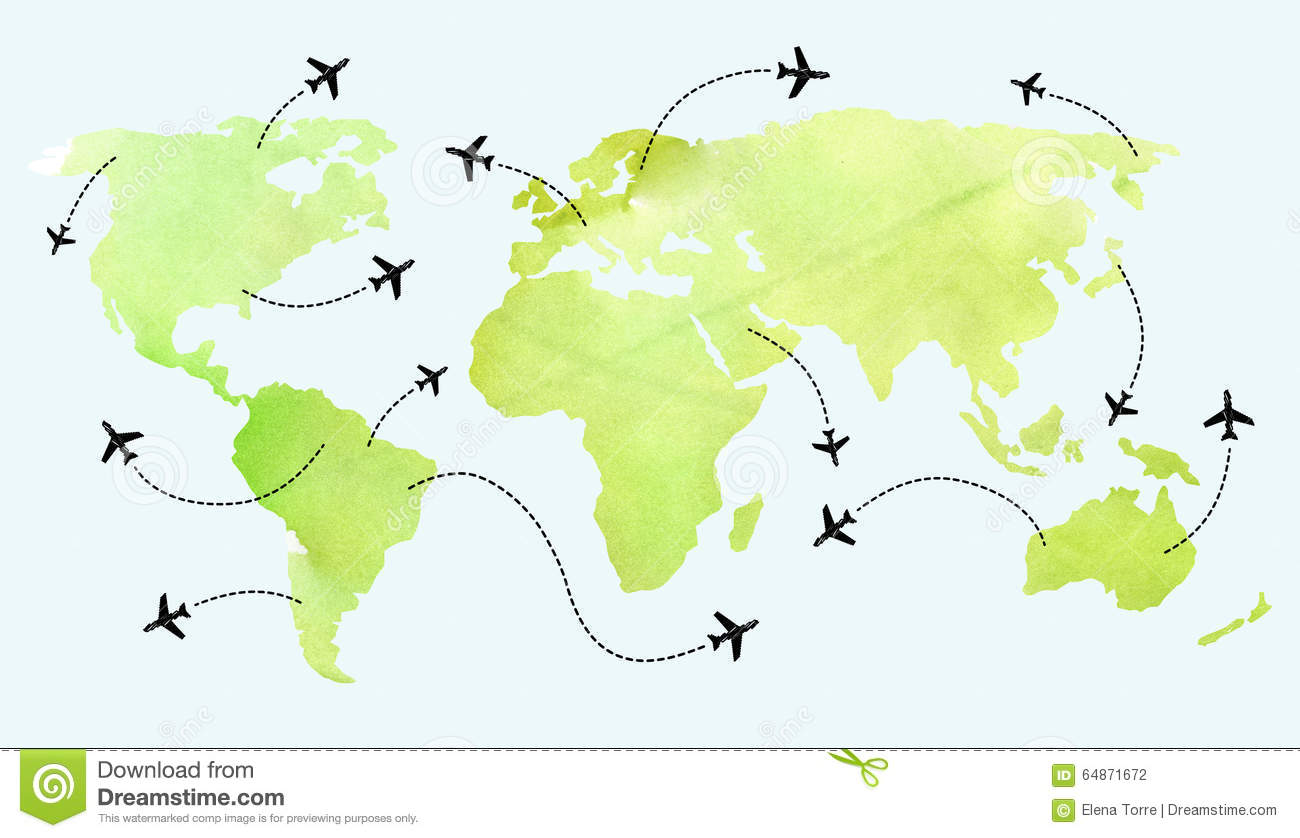

In [70]:
from IPython.display import Image
Image(filename='airplane-routes-world-map-air-travel-flight-paths-lines-watercolor-64871672.jpg')


As an avid traveler, I am interested in seeing if there is an optimal time of year to fly (in terms of avoiding delays, diversions, cancellations, etc.).

The 2015 data comes from Kaggle and includes 3 different sets of data including an airline lookup, an airport lookup, and flight data. 
I removed any airport that included a numeric value (wasn’t included in airport lookup to tie to final analysis)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
airlines = pd.read_csv("./airlines.csv")
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,AS,JetBlue Airways
freq,1,1


In [6]:
airports= pd.read_csv('./airports.csv')
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [8]:
flights = pd.read_csv('./flights.csv.zip', low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
[char for char in "ANC1772" if char in ('1','2') ]

['1', '2']

In [10]:
set("ANC1772").intersection({'','2'})


{'2'}

In [11]:
set("abc9") & set([str(x) for x in range(0,10)]) 

{'9'}

In [12]:
(set("ANC77") & set('12') )== set()
x="ANC7"
(set(x)& set([str(x) for x in range(0,10)]))== set()

False

In [13]:
flights.ORIGIN_AIRPORT[flights.ORIGIN_AIRPORT.apply(lambda x: (set(x)& set([str(x) for x in range(0,10)]))== set())].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [14]:
flights.DESTINATION_AIRPORT[flights.DESTINATION_AIRPORT.apply(lambda x: (set(x)& set([str(x) for x in range(0,10)]))== set())].unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

In [15]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [16]:
print (airlines.shape)
print (airports.shape)
print (flights.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [17]:
#Looking for null values in airlines data
for col in airlines:
    print ("%d NULL values are found in column %s" % (airlines[col].isnull().sum().sum(), col))

0 NULL values are found in column IATA_CODE
0 NULL values are found in column AIRLINE


In [18]:
#Looking for null values in airport data
for col in airports:
    print ("%d NULL values are found in column %s" % (airports[col].isnull().sum().sum(), col))

0 NULL values are found in column IATA_CODE
0 NULL values are found in column AIRPORT
0 NULL values are found in column CITY
0 NULL values are found in column STATE
0 NULL values are found in column COUNTRY
3 NULL values are found in column LATITUDE
3 NULL values are found in column LONGITUDE


In [19]:
#Looking for null values in flights data
for col in flights:
    print ("%d NULL values are found in column %s" % (flights[col].isnull().sum().sum(), col))

0 NULL values are found in column YEAR
0 NULL values are found in column MONTH
0 NULL values are found in column DAY
0 NULL values are found in column DAY_OF_WEEK
0 NULL values are found in column AIRLINE
0 NULL values are found in column FLIGHT_NUMBER
14721 NULL values are found in column TAIL_NUMBER
0 NULL values are found in column ORIGIN_AIRPORT
0 NULL values are found in column DESTINATION_AIRPORT
0 NULL values are found in column SCHEDULED_DEPARTURE
86153 NULL values are found in column DEPARTURE_TIME
86153 NULL values are found in column DEPARTURE_DELAY
89047 NULL values are found in column TAXI_OUT
89047 NULL values are found in column WHEELS_OFF
6 NULL values are found in column SCHEDULED_TIME
105071 NULL values are found in column ELAPSED_TIME
105071 NULL values are found in column AIR_TIME
0 NULL values are found in column DISTANCE
92513 NULL values are found in column WHEELS_ON
92513 NULL values are found in column TAXI_IN
0 NULL values are found in column SCHEDULED_ARRIVAL

In [20]:
#Checking if numbers match between flights cancelled and reasons cancelled
print (flights.shape[0]*flights.CANCELLED.mean())
print (flights.shape[0] - flights.CANCELLATION_REASON.isnull().sum().sum())

89884.0
89884


In [21]:
#Want to join airports and airlines lookup data to flight data

In [22]:
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airlines_dict

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

In [23]:
airports_dict = dict(zip(airports['IATA_CODE'],airports['AIRPORT']))
airports_dict

{'ABE': 'Lehigh Valley International Airport',
 'ABI': 'Abilene Regional Airport',
 'ABQ': 'Albuquerque International Sunport',
 'ABR': 'Aberdeen Regional Airport',
 'ABY': 'Southwest Georgia Regional Airport',
 'ACK': 'Nantucket Memorial Airport',
 'ACT': 'Waco Regional Airport',
 'ACV': 'Arcata Airport',
 'ACY': 'Atlantic City International Airport',
 'ADK': 'Adak Airport',
 'ADQ': 'Kodiak Airport',
 'AEX': 'Alexandria International Airport',
 'AGS': 'Augusta Regional Airport\xc2\xa0(Bush Field)',
 'AKN': 'King Salmon Airport',
 'ALB': 'Albany International Airport',
 'ALO': 'Waterloo Regional Airport',
 'AMA': 'Rick Husband Amarillo International Airport',
 'ANC': 'Ted Stevens Anchorage International Airport',
 'APN': 'Alpena County Regional Airport',
 'ASE': 'Aspen-Pitkin County Airport',
 'ATL': 'Hartsfield-Jackson Atlanta International Airport',
 'ATW': 'Appleton International Airport',
 'AUS': 'Austin-Bergstrom International Airport',
 'AVL': 'Asheville Regional Airport',
 'AVP'

In [24]:

#flights['AIRLINE_NAME'] = flights['AIRLINE'].apply(lambda a: airlines_dict[a])
#flights['AIRPORT_NAME_ORIGIN'] = flights['ORIGIN_AIRPORT'].apply(lambda a: airports_dict[a])
#flights['AIRPORT_NAME_DEST'] = flights['DESTINATION_AIRPORT'].apply(lambda a: airports_dict[a])
#flights.head()

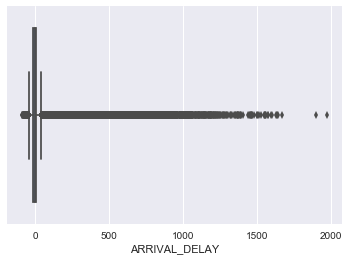

In [25]:
ArrivalDelayBox= sns.boxplot(x=flights["ARRIVAL_DELAY"])

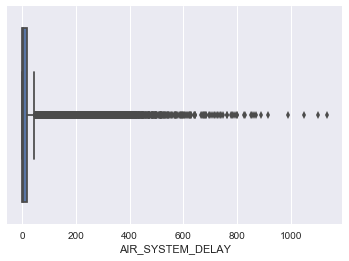

In [26]:
AirSystemDelayBox= sns.boxplot(x=flights["AIR_SYSTEM_DELAY"])

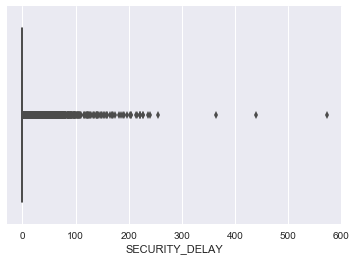

In [27]:
SecurityDelayBox= sns.boxplot(x=flights["SECURITY_DELAY"])

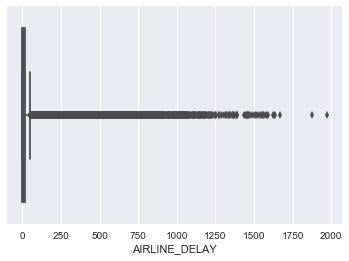

In [28]:
AirlineDelayBox= sns.boxplot(x=flights["AIRLINE_DELAY"])

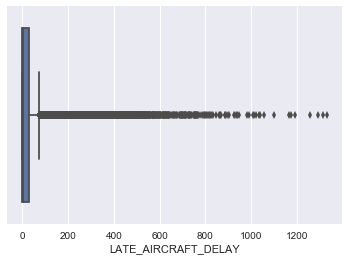

In [29]:
LateAircraftDelayBox= sns.boxplot(x=flights["LATE_AIRCRAFT_DELAY"])

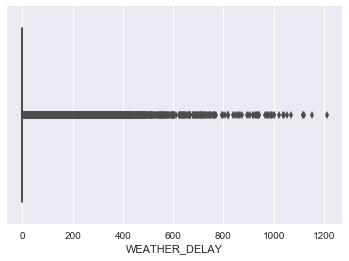

In [30]:
WeatherDelayBox= sns.boxplot(x=flights["WEATHER_DELAY"])

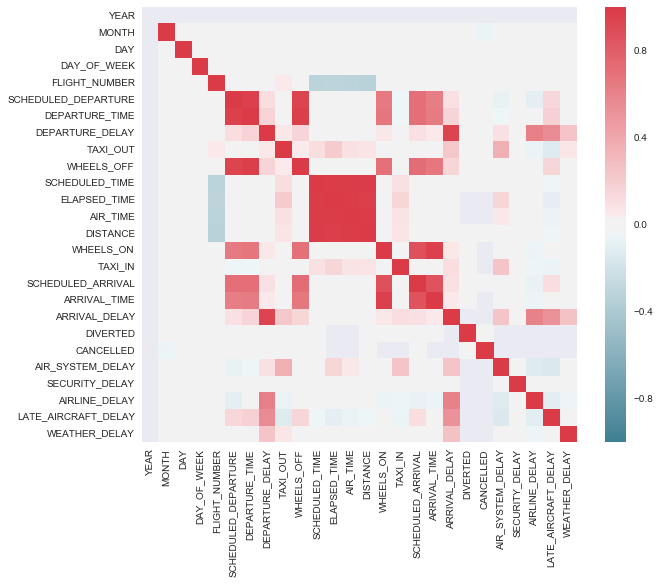

In [31]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = flights.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

There tends to be a high correlation between fields one would expect, such as scheduled arrival and arrival time, as well as scheduled departure and departure time.

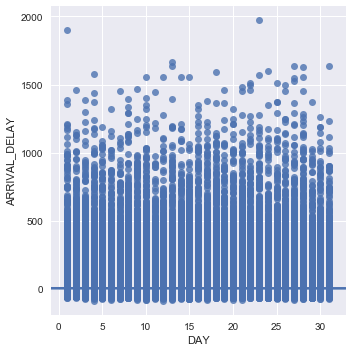

In [32]:
g = sns.lmplot('DAY', 'ARRIVAL_DELAY', flights)
g.set_axis_labels( "DAY OF MONTH", "ARRIVAL_DELAY")

In [35]:
flights['DESC_AIRLINE'] = flights['AIRLINE'].apply(lambda x: airlines_dict[x])
flights.head()['DESC_AIRLINE']

0      Alaska Airlines Inc.
1    American Airlines Inc.
2           US Airways Inc.
3    American Airlines Inc.
4      Alaska Airlines Inc.
Name: DESC_AIRLINE, dtype: object

/Users/chelseatalbot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


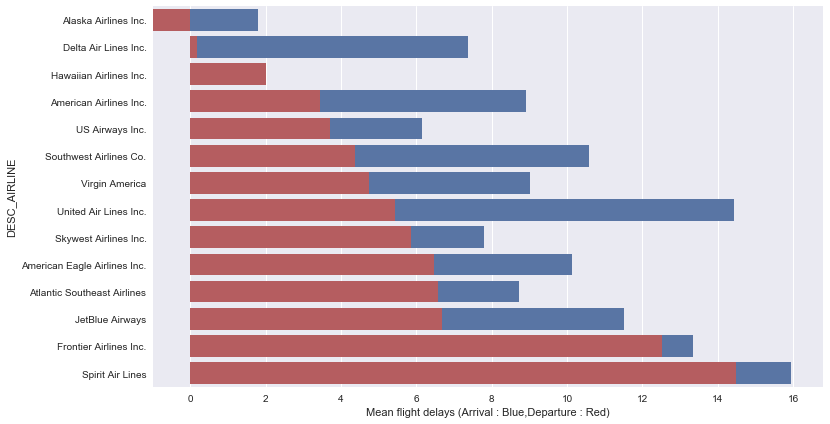

In [38]:
df_delay = pd.DataFrame(flights.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean())
df_delay.sort(['ARRIVAL_DELAY','DEPARTURE_DELAY'],ascending = [1,1],inplace=True)
plt.figure(figsize=(12,7))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='DEPARTURE_DELAY',y=df_delay.index,data = df_delay,color = 'b')
plot = sns.barplot(x='ARRIVAL_DELAY',y=df_delay.index,data = df_delay,color = 'r')
plot.set(xlabel='Mean flight delays (Arrival : Blue,Departure : Red)')

In [45]:
flights.YEAR.unique() #2015
day_of_week_desc={
    7:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
flights['DESC_DOW']=flights['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])
flights.head()['DESC_DOW']

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: DESC_DOW, dtype: object

In [46]:
flights.DESC_DOW.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [48]:

month_desc={
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
flights['DESC_MONTH']=flights['MONTH'].apply(lambda a:month_desc[a])
flights.head()['DESC_MONTH']

0    January
1    January
2    January
3    January
4    January
Name: DESC_MONTH, dtype: object

In [49]:
flights.DESC_MONTH.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'], dtype=object)

/Users/chelseatalbot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


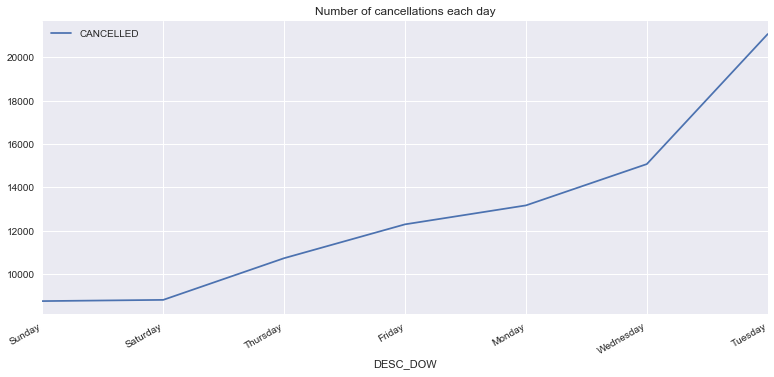

In [40]:
df_cancellations = pd.DataFrame(flights.groupby('DESC_DOW').sum()['CANCELLED'])
df_cancellations=df_cancellations.sort(['CANCELLED'],ascending =1)
df_cancellations.head()
df_cancellations.plot(kind='line',figsize=(13,6),subplots=True,legend=True)
plt.title('Number of cancellations each day')

/Users/chelseatalbot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


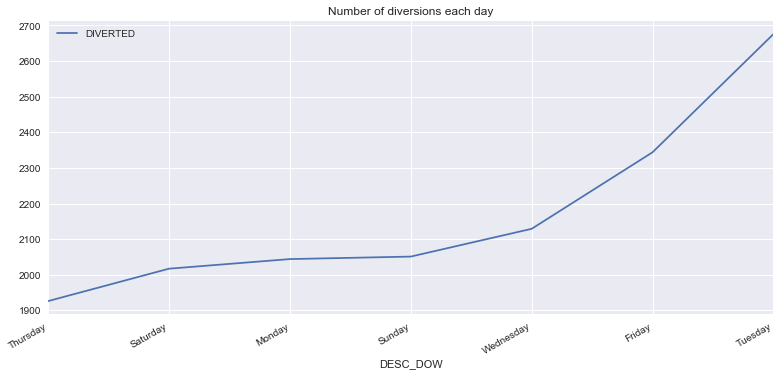

In [42]:
df_diverted = pd.DataFrame(flights.groupby('DESC_DOW').sum()['DIVERTED'])
df_diverted =df_diverted.sort(['DIVERTED'],ascending =1)
df_diverted.head()
df_diverted.plot(kind='line',figsize=(13,6),subplots=True,legend=True)
plt.title('Number of diversions each day')

**Interesting to note that Tuesday has the highest amount of both cancellations and diversions.


In [43]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ DESC_DOW', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     926.4
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        19:55:11   Log-Likelihood:            -2.9078e+07
No. Observations:             5714008   AIC:                         5.816e+07
Df Residuals:                 5714001   BIC:                         5.816e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 5.6683      0.042    133.754      0.000         5.585     5.751
DESC_DOW[T.Monday]       -1.7100      0.061    -28.053      0.000        -1.830    -1.591
DESC_DOW[T.Saturday]     -0.9043      0.060    -15.059      0.000        -1.022    -0.787
DESC_DOW[T.Sunday]       -3.8154      0.063    -60.104      0.000        -3.940    -3.691
DESC_DOW[T.Thursday]     -1.8229      0.060    -30.284      0.000        -1.941    -1.705
DESC_DOW[T.Tuesday]       0.3337      0.060      5.542      0.000         0.216     0.452
DESC_DOW[T.Wednesday]    -1.4223      0.060    -23.516      0.000        -1.541    -1.304
==============================================================================
Omnibus:                  7094728.299   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2322901274.821
Skew:                           6.508   Prob(JB):                         0.00
Kurtosis:                     100.915   Cond. No.                         7.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ DESC_MONTH', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3276.
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        21:22:48   Log-Likelihood:            -2.9063e+07
No. Observations:             5714008   AIC:                         5.813e+07
Df Residuals:                 5713996   BIC:                         5.813e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   3.1632      0.057     55.937      0.000         3.052     3.274
DESC_MONTH[T.August]        1.4442      0.079     18.284      0.000         1.289     1.599
DESC_MONTH[T.December]      2.9297      0.080     36.449      0.000         2.772     3.087
DESC_MONTH[T.February]      5.1573      0.083     61.831      0.000         4.994     5.321
DESC_MONTH[T.January]       2.6504      0.081     32.745      0.000         2.492     2.809
DESC_MONTH[T.July]          3.2686      0.079     41.587      0.000         3.115     3.423
DESC_MONTH[T.June]          6.4384      0.079     81.068      0.000         6.283     6.594
DESC_MONTH[T.March]         1.7575      0.079     22.121      0.000         1.602     1.913
DESC_MONTH[T.May]           1.3218      0.080     16.617      0.000         1.166     1.478
DESC_MONTH[T.November]     -2.0624      0.081    -25.557      0.000        -2.221    -1.904
DESC_MONTH[T.October]      -3.9436      0.080    -49.404      0.000        -4.100    -3.787
DESC_MONTH[T.September]    -3.9358      0.081    -48.765      0.000        -4.094    -3.778
==============================================================================
Omnibus:                  7105653.491   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2356571414.319
Skew:                           6.522   Prob(JB):                         0.00
Kurtosis:                     101.630   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ WEATHER_DELAY', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                 8.019e+04
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        21:23:19   Log-Likelihood:            -5.8972e+06
No. Observations:             1063439   AIC:                         1.179e+07
Df Residuals:                 1063437   BIC:                         1.179e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        56.4870      0.061    930.765      0.000        56.368    56.606
WEATHER_DELAY     0.8326      0.003    283.177      0.000         0.827     0.838
==============================================================================
Omnibus:                  1115478.974   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        139297754.401
Skew:                           5.080   Prob(JB):                         0.00
Kurtosis:                      58.141   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Surprised to see how low the R-Squared was for weather to airline delay.

In [75]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ SECURITY_DELAY', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     99.14
Date:                Wed, 24 May 2017   Prob (F-statistic):           2.36e-23
Time:                        21:23:20   Log-Likelihood:            -5.9358e+06
No. Observations:             1063439   AIC:                         1.187e+07
Df Residuals:                 1063437   BIC:                         1.187e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         58.8924      0.062    944.683      0.000        58.770    59.015
SECURITY_DELAY     0.2894      0.029      9.957      0.000         0.232     0.346
==============================================================================
Omnibus:                  1090691.432   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        119279628.817
Skew:                           4.933   Prob(JB):                         0.00
Kurtosis:                      53.937   Cond. No.                         2.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ AIRLINE_DELAY', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 6.281e+05
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        21:23:21   Log-Likelihood:            -5.6890e+06
No. Observations:             1063439   AIC:                         1.138e+07
Df Residuals:                 1063437   BIC:                         1.138e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        43.4939      0.053    819.170      0.000        43.390    43.598
AIRLINE_DELAY     0.8129      0.001    792.510      0.000         0.811     0.815
==============================================================================
Omnibus:                   915197.411   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46002917.380
Skew:                           3.922   Prob(JB):                         0.00
Kurtosis:                      34.252   Cond. No.                         55.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ AIR_SYSTEM_DELAY', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                 6.921e+04
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        21:23:22   Log-Likelihood:            -5.9023e+06
No. Observations:             1063439   AIC:                         1.180e+07
Df Residuals:                 1063437   BIC:                         1.180e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           51.2691      0.067    765.190      0.000        51.138    51.400
AIR_SYSTEM_DELAY     0.5671      0.002    263.071      0.000         0.563     0.571
==============================================================================
Omnibus:                  1135724.193   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        149666867.611
Skew:                           5.226   Prob(JB):                         0.00
Kurtosis:                      60.170   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lm = smf.ols(formula='ARRIVAL_DELAY ~ LATE_AIRCRAFT_DELAY', data=flights).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                 3.983e+05
Date:                Wed, 24 May 2017   Prob (F-statistic):               0.00
Time:                        21:23:23   Log-Likelihood:            -5.7667e+06
No. Observations:             1063439   AIC:                         1.153e+07
Df Residuals:                 1063437   BIC:                         1.153e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              40.6894      0.060    672.766      0.000        40.571    40.808
LATE_AIRCRAFT_DELAY     0.7764      0.001    631.132      0.000         0.774     0.779
==============================================================================
Omnibus:                  1322537.662   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        337464702.459
Skew:                           6.638   Prob(JB):                         0.00
Kurtosis:                      89.254   Cond. No.                         56.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
airline_rank_v1 = pd.DataFrame({'flight_volume' : flights.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()}).reset_index()
airline_rank_v1.sort_values("flight_volume", ascending=True, inplace=True)
flight_volume_total = airline_rank_v1['flight_volume'].sum()
airline_rank_v1['flight_pcnt'] = airline_rank_v1['flight_volume']/flight_volume_total

In [62]:
airline_rank_v2 = pd.DataFrame({'cancellation_rate' : flights.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()
airline_rank_v2.sort_values("cancellation_rate", ascending=False, inplace=True)
airline_rank_v3 = pd.DataFrame({'divertion_rate' : flights.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
airline_rank_v3.sort_values("divertion_rate", ascending=False, inplace=True)
airline_rank_v4 = pd.merge(airline_rank_v1, airline_rank_v2, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v4 = pd.merge(airline_rank_v1, airline_rank_v3, left_on='AIRLINE', right_on='AIRLINE', how='left')

In [63]:
airline_rank_v4

,AIRLINE,flight_volume,flight_pcnt,divertion_rate
0,VX,61903,0.010638,0.001955
1,HA,76272,0.013107,0.000787
2,F9,90836,0.015610,0.001739
3,NK,117379,0.020171,0.001551
4,AS,172521,0.029647,0.002394
5,US,198715,0.034149,0.002139
6,B6,267048,0.045892,0.002734
7,MQ,294632,0.050632,0.002770
8,UA,515723,0.088626,0.002691
9,EV,571977,0.098293,0.003486
